# UFC Predictions

### Step 1: Load Data

The following CSV files were retrieved from the Kaggle UFC dataset.

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_columns = 999

dat_df = pd.read_csv("../data/ufc/data.csv")
prep_dat_df = pd.read_csv("../data/ufc/preprocessed_data.csv")
raw_fighters_df = pd.read_csv("../data/ufc/raw_fighter_details.csv")
raw_dat_df = pd.read_csv("../data/ufc/raw_total_fight_data.csv", sep=";")

dat_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [23]:
# I'd like to have one row per fighter per fight. That is, 2 rows per fight, with a simple "is_winner" column.

import re


r_fighter_cols = [col for col in dat_df.columns if col.startswith("R_")]
b_fighter_cols = [col for col in dat_df.columns if col.startswith("B_")]

other_cols = [col for col in dat_df.columns if col not in r_fighter_cols and col not in b_fighter_cols]

def extractFighters(dat_df, fighter_cols, opp_cols, fighter_prefix, opp_prefix, fighter_color):

    fighters_df = dat_df[fighter_cols + other_cols].copy()
    fighters_df.columns = [col.replace(fighter_prefix, "") for col in fighters_df.columns]
    fighters_df["is_winner"] = fighters_df["Winner"] == fighter_color

    opp_df = dat_df[opp_cols].copy()
    opp_df.columns = [re.sub(r"^" + opp_prefix, "opponent_", col) for col in opp_df.columns]

    fighters_df = pd.concat([fighters_df, opp_df], axis=1)
    
    return fighters_df

r_fighters_df = extractFighters(dat_df, r_fighter_cols, b_fighter_cols, "R_", "B_", "Red")
b_fighters_df = extractFighters(dat_df, b_fighter_cols, r_fighter_cols, "B_", "R_", "Blue")

fighters_df = pd.concat([r_fighters_df, b_fighters_df], axis=0)
fighters_df.head()

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,Winner,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,opponent_Height_cms,opponent_Reach_cms,opponent_Stance,opponent_Weight_lbs,opponent_age,opponent_avg_BODY_att,opponent_avg_BODY_landed,opponent_avg_CLINCH_att,opponent_avg_CLINCH_landed,opponent_avg_DISTANCE_att,opponent_avg_DISTANCE_landed,opponent_avg_GROUND_att,opponent_avg_GROUND_landed,opponent_avg_HEAD_att,opponent_avg_HEAD_landed,opponent_avg_KD,opponent_avg_LEG_att,opponent_avg_LEG_landed,opponent_avg_PASS,opponent_avg_REV,opponent_avg_SIG_STR_att,opponent_avg_SIG_STR_landed,opponent_avg_SIG_STR_pct,opponent_avg_SUB_ATT,opponent_avg_TD_att,opponent_avg_TD_landed,opponent_avg_TD_pct,opponent_avg_TOTAL_STR_att,opponent_avg_TOTAL_STR_landed,opponent_avg_opp_BODY_att,opponent_avg_opp_BODY_landed,opponent_avg_opp_CLINCH_att,opponent_avg_opp_CLINCH_landed,opponent_avg_opp_DISTANCE_att,opponent_avg_opp_DISTANCE_landed,opponent_avg_opp_GROUND_att,opponent_avg_opp_GROUND_landed,opponent_avg_opp_HEAD_att,opponent_avg_opp_HEAD_landed,opponent_avg_opp_KD,opponent_avg_opp_LEG_att,opponent_avg_opp_LEG_landed,opponent_avg_opp_PASS,opponent_avg_opp_REV,opponent_avg_opp_SIG_STR_att,opponent_avg_opp_SIG_STR_landed,opponent_avg_opp_SIG_STR_pct,opponent_avg_opp_SUB_ATT,opponent_avg_opp_TD_att,opponent_avg_opp_TD_landed,opponent_avg_opp_TD_pct,opponent_avg_opp_TOTAL_STR_att,opponent_avg_opp_TOTAL_STR_landed,opponent_current_lose_streak,opponent_current_win_streak,opponent_draw,opponent_fighter,opponent_longest_win_streak,opponent_losses,opponent_total_rounds_fought,opponent_total_time_fought(seconds),opponent_total_title_bouts,opponent_win_by_Decision_Majority,opponent_win_by_Decision_Split,opponent_win_by_Decision_Unanimous,opponent_win_by_KO/TKO,opponent_win_by_Submission,opponent_win_by_TKO_Doctor_Stoppage,opponent_wins,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins
0,162.56,162.56,Marc Goddard,Orthodox,135.0,Red,32.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,NaN,NaN,NaN,101.400000,44.000000,0.466000,NaN,0.100000,5.300000,1.900000,0.458000,NaN,NaN,129.900000,69.100000,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,NaN,NaN,NaN,98.800000,32.200000,0.336000,NaN,0.000000,0.900000,0.100000,0.050000,NaN,NaN,110.500000,43.300000,0.0,4.0,2019-06-08,0.0,Henry Cejudo,True,"Chicago, Illinois, USA",4.0,2.0,5,167.64,170.18,Orthodox,135.0,31.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400

In [24]:

for col in [col for col in fighters_df.select_dtypes(include="number").columns if col.startswith("opponent_")]:
    
    col2 = col
    col1 = col[9:]
    
    fighters_df[col1 + "_ratio"] = (fighters_df[col1] + 1) / (fighters_df[col2] + 1)
    
# prevent leakage
fighters_df = fighters_df.drop(columns="Winner")

# change prefixes to suffixes
fighters_df.columns = [col[9:] + "_opponent" if col.startswith("opponent_") else col for col in fighters_df.columns]


### Step 2: Establish Baseline

This is expected to be exactly 50% because for every winner there is a loser.

In [25]:
from sklearn.metrics import accuracy_score

majority_class = fighters_df["is_winner"].mode()[0]
baseline_pred = [majority_class] * len(fighters_df)
baseline_acc = accuracy_score(baseline_pred, fighters_df["is_winner"]) * 100

print(f"""
    Majority class: {majority_class}
    Baseline accuracy: {baseline_acc:.2f}%
""")


    Majority class: False
    Baseline accuracy: 50.81%



##### Explanation

It turns out 50.81% have False for "is_winner". This is probably because in the case of ties, neither fighter is considered the winner.

### Step 3: Linear Model

We will use a `LogisticRegression` and see if we can beat the baseline.

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


train, test = train_test_split(fighters_df)

target = "is_winner"
features = fighters_df.columns.drop([target] + ["age", "age_opponent", "Referee", "date"])

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [27]:
lr_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value="0"),
    LogisticRegression(max_iter=333),
)

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

lr_score = accuracy_score(y_pred, y_test)*100
improvement = lr_score - baseline_acc

print(f"""
    Accuracy score for LogisticRegression: {lr_score:.2f}%
    Improvement over baseline: {improvement:.2f}%
""")

/home/cowley/venv/lambda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



    Accuracy score for LogisticRegression: 64.97%
    Improvement over baseline: 14.16%



We achieved a notable improvement over baseline with a logistic regression.

### Step 4: Try RandomForestClassifier

We will use a `RandomForestClassifier` and see if we can beat the logistic regression.

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    RandomForestClassifier(n_jobs=-1, n_estimators=220),
)

rfc_pipeline.fit(X_train, y_train)
y_pred = rfc_pipeline.predict(X_test)

rfc_score = accuracy_score(y_pred, y_test)*100
improvement_base = rfc_score - baseline_acc
improvement_lr = rfc_score - lr_score

print(f"""
    Accuracy score for Random Forest: {rfc_score:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over logistic: {improvement_lr:.2f}%
""")


    Accuracy score for Random Forest: 67.19%
    Improvement over baseline: 16.38%
    Improvement over logistic: 2.22%



### Step 5: Try XGBClassifier

We will use a `XGBClassifier` to see if we can beat the random forest.

The parameters were optimized with a `RandomizedSearchCV` in a separate notebook.

In [29]:
from xgboost import XGBClassifier

xgb_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    XGBClassifier(
        n_jobs=-1,
        n_estimators=220,
        max_depth=76,
        learning_rate=0.22,
    )
)


xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)

xgb_score = accuracy_score(y_pred, y_test)*100
improvement_base = xgb_score - baseline_acc
improvement_lr = xgb_score - lr_score
improvement_rfc = xgb_score - rfc_score

print(f"""
    Accuracy score for XGB: {xgb_score:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over logistic: {improvement_lr:.2f}%
    Improvement over random forest: {improvement_rfc:.2f}%
""")


    Accuracy score for XGB: 66.84%
    Improvement over baseline: 16.03%
    Improvement over logistic: 1.87%
    Improvement over random forest: -0.35%



### Step 6: Permutation Importance

Analyze which features may detract from the accuracy.

In [30]:
from eli5.sklearn import PermutationImportance

transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
)

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



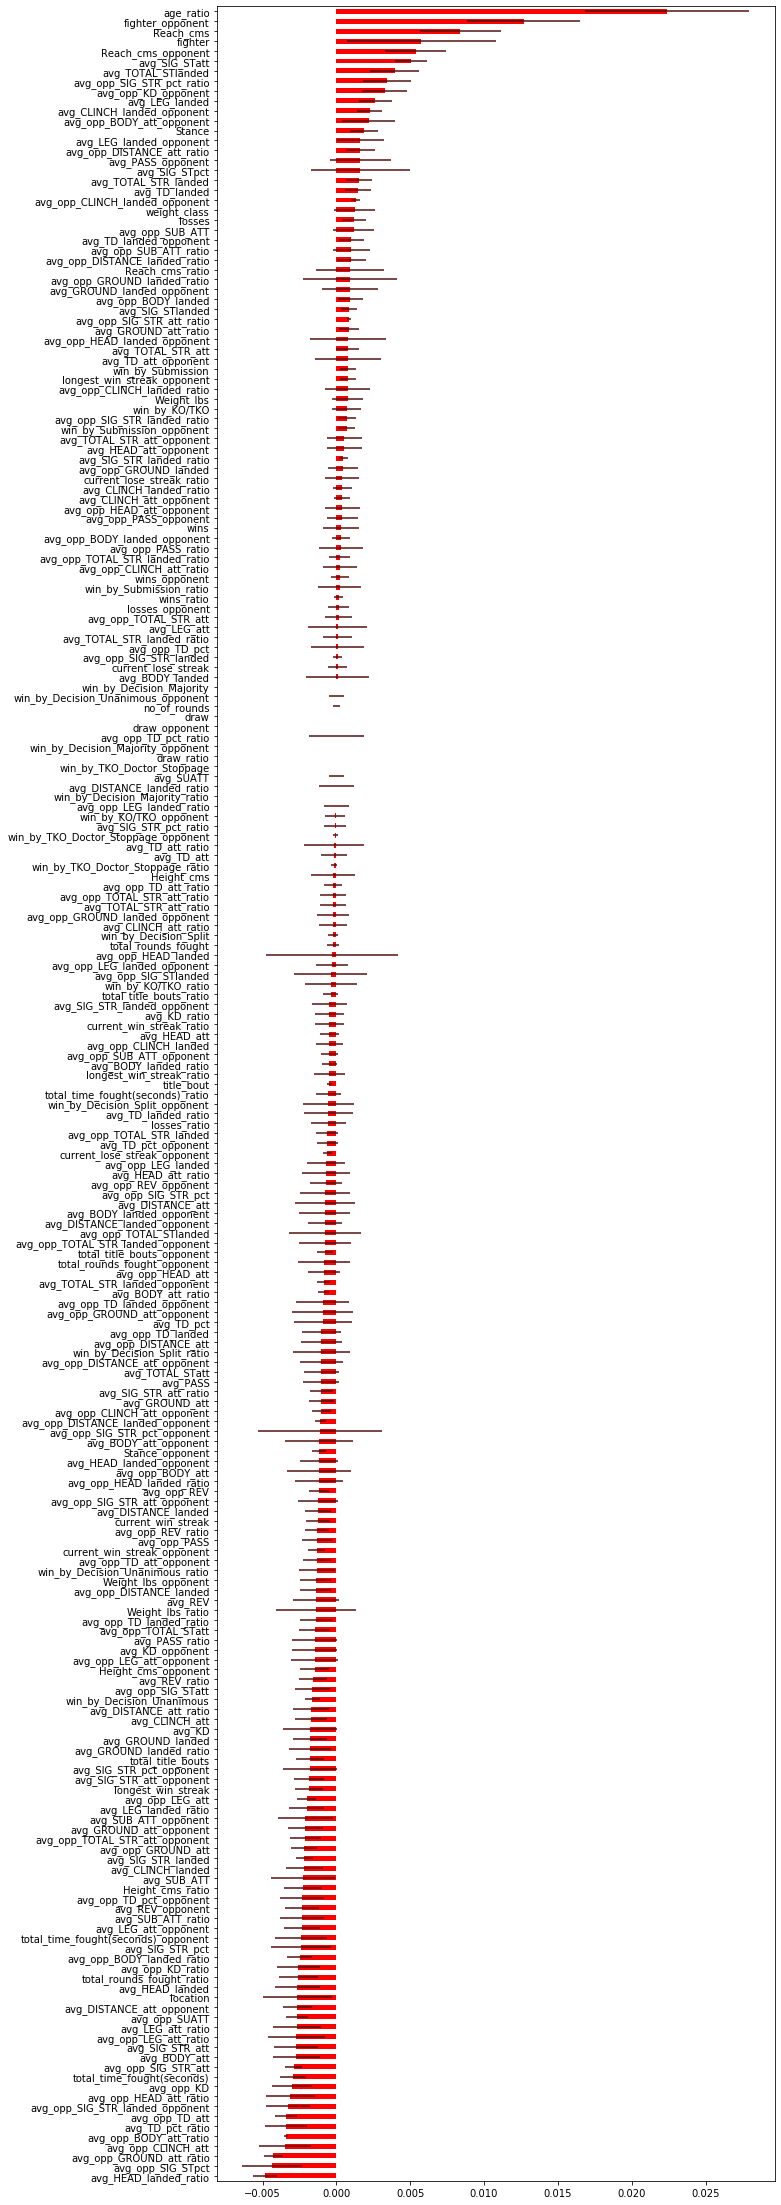

In [40]:
from matplotlib import pyplot as plt

model = XGBClassifier(
    n_jobs=-1,
    n_estimators=220,
    max_depth=76,
    learning_rate=0.22,
)
model.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    model,
    scoring="accuracy",
    n_iter=5,
)

permuter.fit(X_test_transformed, y_test)

fig, ax = plt.subplots(figsize=(10, 40))

feature_importances = pd.Series(permuter.feature_importances_, features).sort_values()
feature_importances_std = pd.Series(permuter.feature_importances_std_, features).sort_values()
feature_importances.plot.barh(color="red", ecolor="#501010", xerr=feature_importances_std, ax=ax)

fig.show()

In [41]:
feature_importances_plus_std = pd.Series(permuter.feature_importances_ + permuter.feature_importances_std_, features)

xgb_best_features = fighters_df.columns.drop([target] + ["age", "age_opponent", "Referee", "date"] + list(feature_importances_plus_std[feature_importances_plus_std <= 0].index))

X_train_xgb = train[xgb_best_features]
X_test_xgb = test[xgb_best_features]

xgb_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    XGBClassifier(
        n_jobs=-1,
        n_estimators=220,
        max_depth=76,
        learning_rate=0.22,
    )
)


xgb_pipeline.fit(X_train_xgb, y_train)
y_pred = xgb_pipeline.predict(X_test_xgb)

xgb_score2 = accuracy_score(y_pred, y_test)*100
improvement_base = xgb_score2 - baseline_acc
improvement_xgb = xgb_score2 - xgb_score

print(f"""
    Accuracy score for XGB with optimized features: {xgb_score2:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over base XGB: {improvement_xgb:.2f}%
""")


    Accuracy score for XGB with optimized features: 67.30%
    Improvement over baseline: 16.49%
    Improvement over base XGB: 0.47%



Marginal gains.

Let's try again with Random Forest.

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



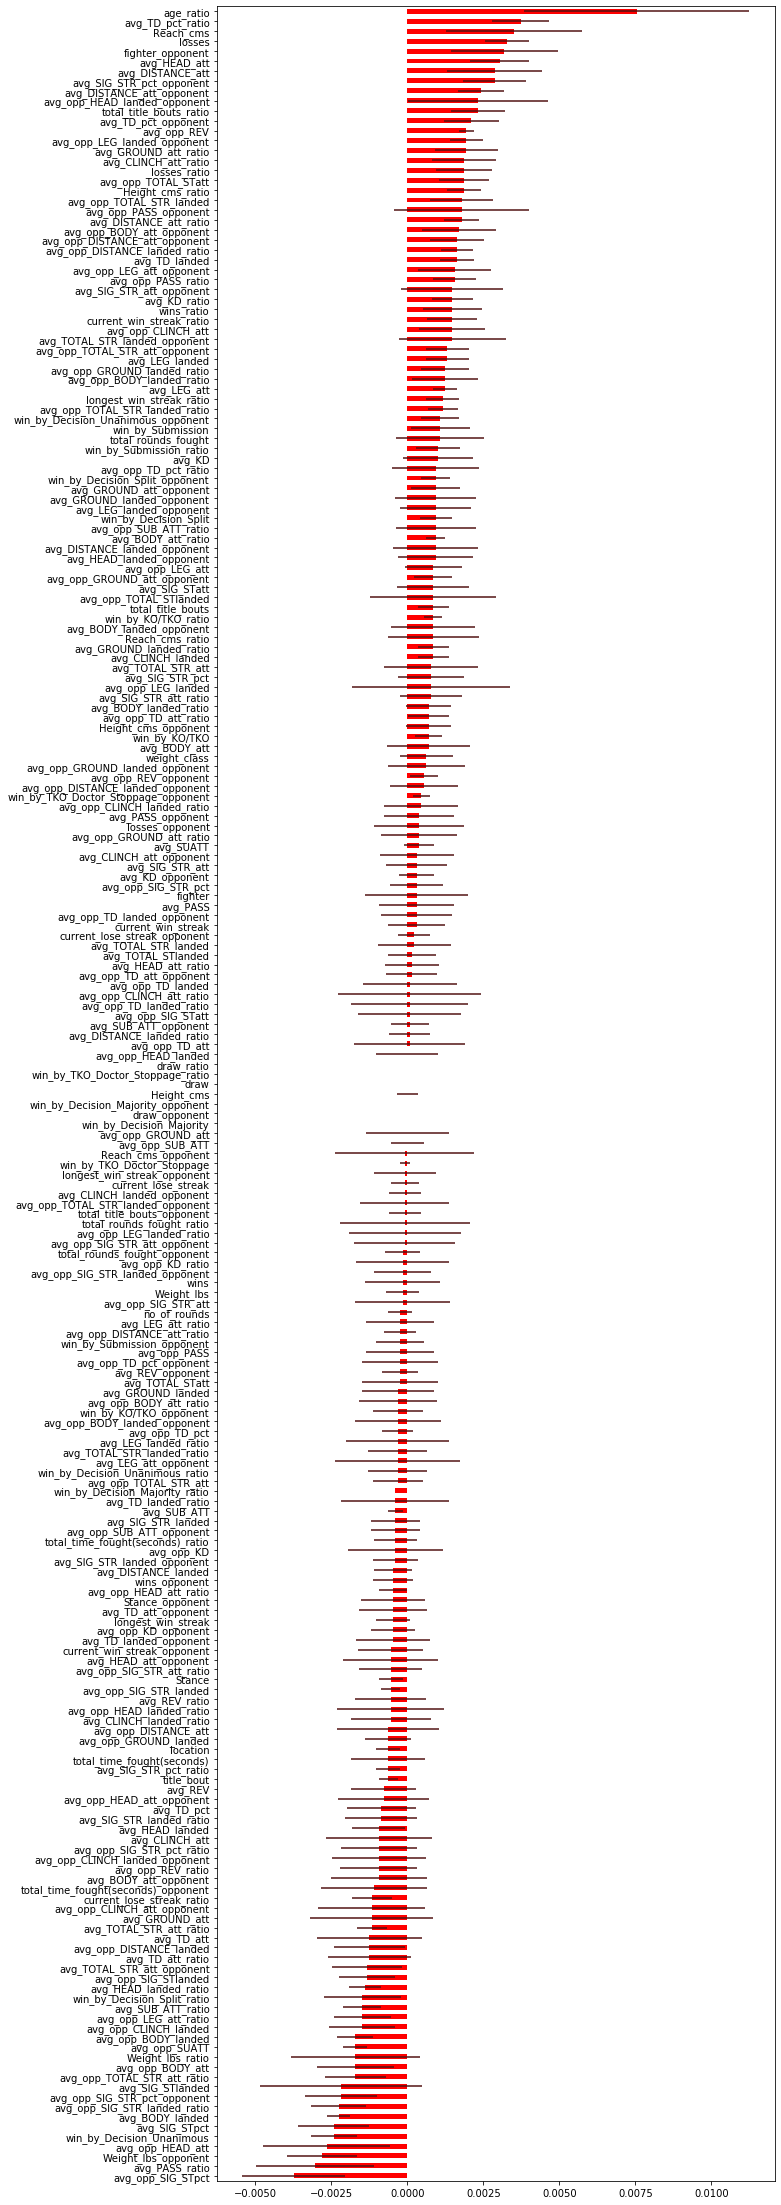

In [42]:
model = RandomForestClassifier(
    n_jobs=-1,
    n_estimators=220,
)
model.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    model,
    scoring="accuracy",
    n_iter=5,
)

permuter.fit(X_test_transformed, y_test)

fig, ax = plt.subplots(figsize=(10, 40))

feature_importances = pd.Series(permuter.feature_importances_, features).sort_values()
feature_importances_std = pd.Series(permuter.feature_importances_std_, features).sort_values()
feature_importances.plot.barh(color="red", ecolor="#501010", xerr=feature_importances_std, ax=ax)

fig.show()

In [43]:
feature_importances_plus_std = pd.Series(permuter.feature_importances_ + permuter.feature_importances_std_, features)

rfc_best_features = fighters_df.columns.drop([target] + ["age", "age_opponent", "Referee", "date"] + list(feature_importances_plus_std[feature_importances_plus_std <= 0].index))

X_train_rfc = train[rfc_best_features]
X_test_rfc = test[rfc_best_features]

rfc_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    RandomForestClassifier(
        n_jobs=-1,
        n_estimators=220,
    )
)

rfc_pipeline.fit(X_train_rfc, y_train)
y_pred = rfc_pipeline.predict(X_test_rfc)

rfc_score2 = accuracy_score(y_pred, y_test)*100
improvement_base = rfc_score2 - baseline_acc
improvement_rfc = rfc_score2 - rfc_score

print(f"""
    Accuracy score for Random Forest with optimized features: {rfc_score2:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over base RFC: {improvement_rfc:.2f}%
""")


    Accuracy score for Random Forest with optimized features: 67.57%
    Improvement over baseline: 16.77%
    Improvement over base RFC: 0.39%



To wrap up the permutations, I'd like to make two more visualizations showing the feature importances.

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



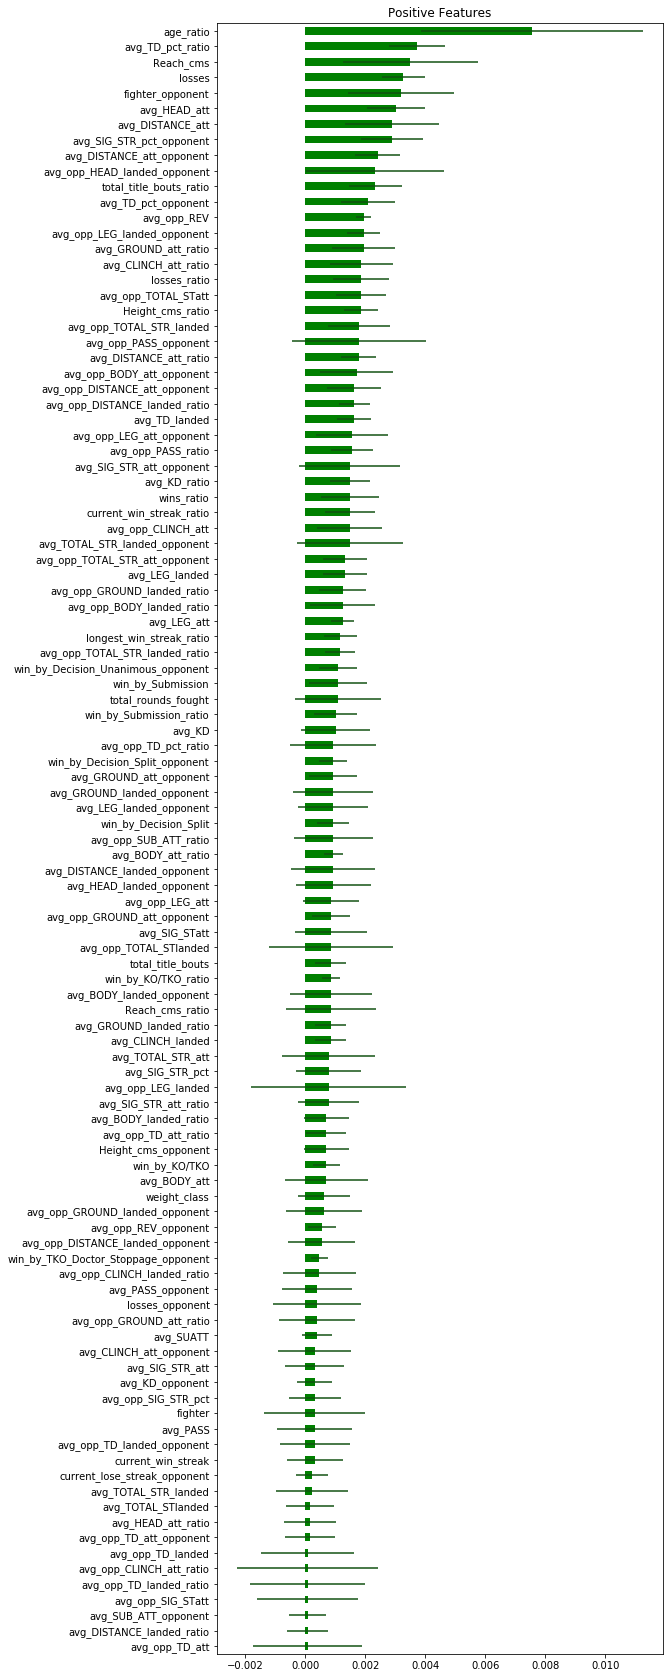

In [48]:
good_mask = feature_importances > 0
bad_mask = feature_importances <= 0

fig, ax = plt.subplots(figsize=(8, 30))

feature_importances[good_mask].plot.barh(color="green", ecolor="#105010", xerr=feature_importances_std[good_mask], ax=ax)
ax.set_title("Positive Features")

fig.show()

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



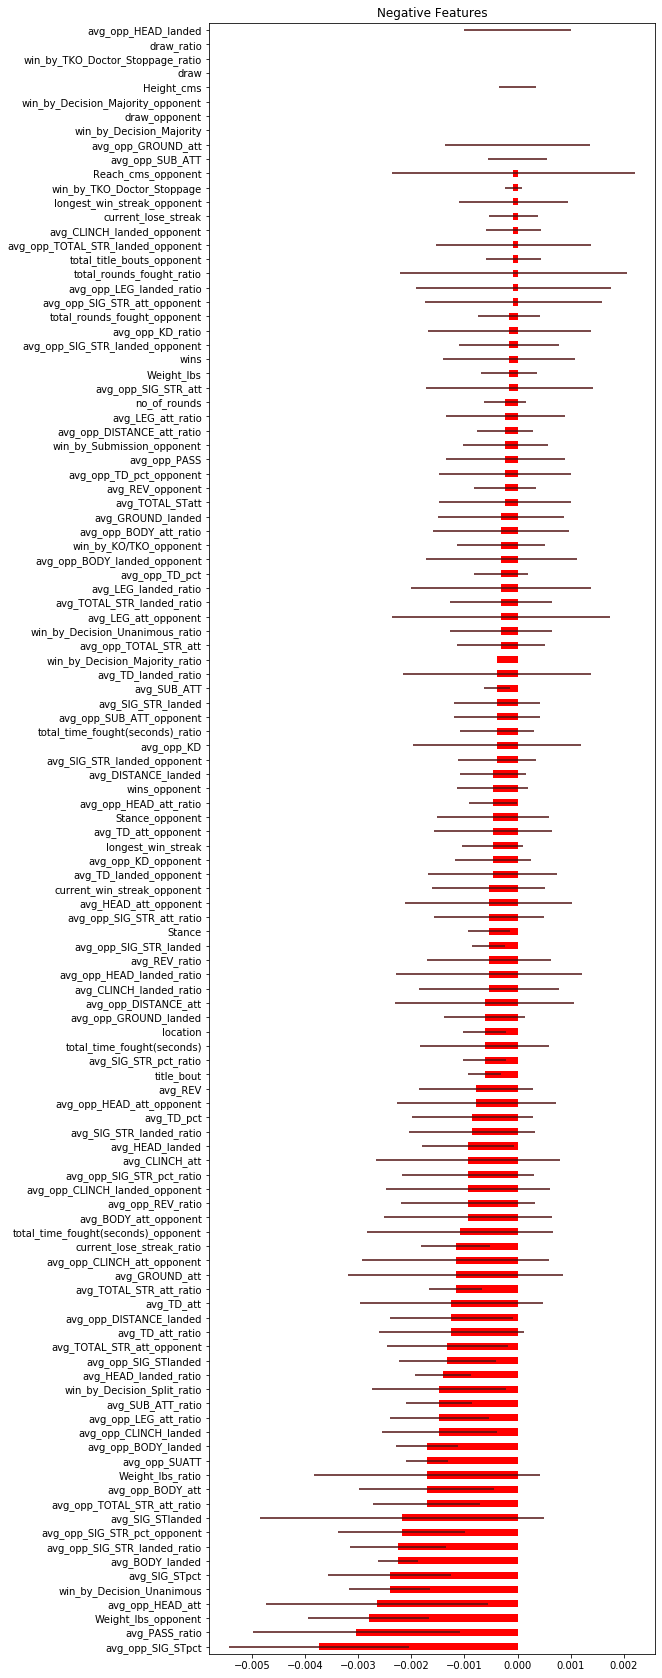

In [49]:
fig, ax = plt.subplots(figsize=(8, 30))

feature_importances[bad_mask].plot.barh(color="red", ecolor="#501010", xerr=feature_importances_std[bad_mask], ax=ax)
ax.set_title("Negative Features")

fig.show()

In [39]:
from plotly.offline import iplot, init_notebook_mode
import numpy as np

init_notebook_mode(connected=True)



<function plotly.offline.offline.init_notebook_mode(connected=False)>